In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Make some (linear) data
NDATA = 6
SIG_NOISE = 0.3
XRANGE = (-1, 1)

def func(x, m=2.2, b=-0.7):
    return m*x + b
    
np.random.seed(0)
x = np.random.uniform(XRANGE[0], XRANGE[1], size=NDATA)
n = np.random.normal(size=NDATA, scale=SIG_NOISE)
y_true = func(x)
y_meas = y_true + n

In [34]:
# Fit a line
DEG = 1
poly = np.polyfit(x, y_meas, deg=DEG)

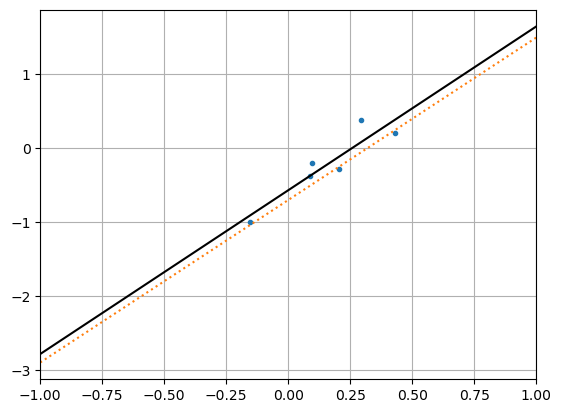

In [35]:
plt.figure()
plt.plot(x, y_meas, '.')
plt.plot(XRANGE, func(np.array(XRANGE)), ':')
plt.plot(XRANGE, np.polyval(poly, np.array(XRANGE)), 'k-')
plt.xlim(*XRANGE)
plt.grid()

In [55]:
# Example 1: bootstrap resampling
NBOOTS = 1000
np.random.seed(1)

polys_boot = []
for i in range(NBOOTS):
    inds_boot = np.random.randint(NDATA, size=NDATA)
    poly = np.polyfit(x[inds_boot], y_meas[inds_boot], deg=DEG)
    polys_boot.append(poly)

In [75]:
polys_boot = np.array(polys_boot)
polys_boot_mean = np.mean(polys_boot, axis=0)  # ONLY WORKS IF LINEAR
polys_boot_lo = np.percentile(polys_boot, 5, axis=0)
polys_boot_hi = np.percentile(polys_boot, 95, axis=0)
for i in range(DEG + 1):
    print(f"{polys_boot_mean[i]:+5.3f} [{polys_boot_lo[i]:+5.3f}, {polys_boot_hi[i]:+5.3f}]")

+2.251 [+1.380, +3.096]
-0.552 [-0.669, -0.346]


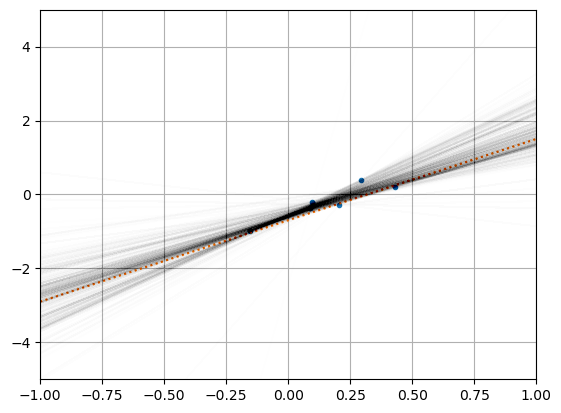

In [60]:
plt.figure()
plt.plot(x, y_meas, '.')
plt.plot(XRANGE, func(np.array(XRANGE)), ':')
for poly in polys_boot:
    plt.plot(XRANGE, np.polyval(poly, np.array(XRANGE)), 'k-', alpha=2/NBOOTS)
plt.xlim(*XRANGE)
plt.ylim(-5, 5)
plt.grid()

In [38]:
# Example 2: Dropout resampling
polys_drop = []
inds = np.arange(NDATA)
for i in range(NDATA):
    poly = np.polyfit(x[inds != i], y_meas[inds != i], deg=DEG)
    polys_drop.append(poly)

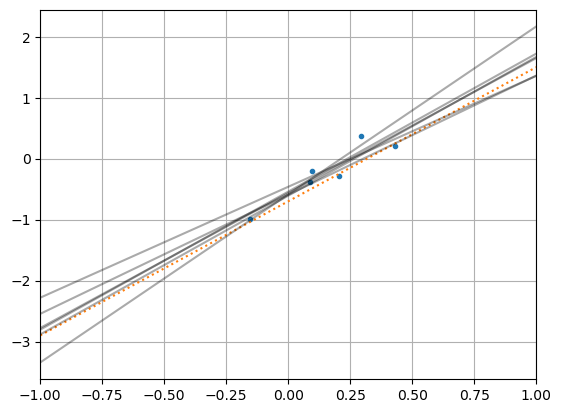

In [39]:
plt.figure()
plt.plot(x, y_meas, '.')
plt.plot(XRANGE, func(np.array(XRANGE)), ':')
for poly in polys_drop:
    plt.plot(XRANGE, np.polyval(poly, np.array(XRANGE)), 'k-', alpha=2/NDATA)
plt.xlim(*XRANGE)
plt.grid()

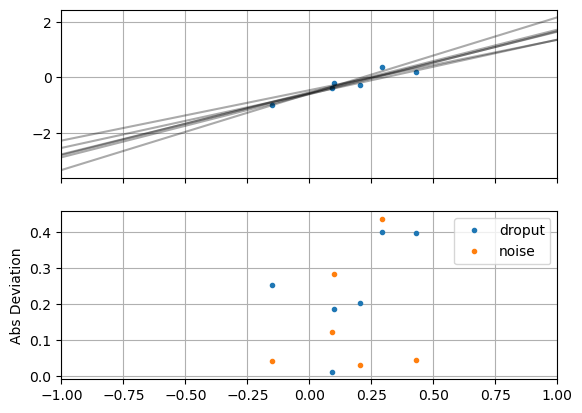

In [51]:
fig, axes = plt.subplots(nrows=2, sharex=True)
err = [y_meas[i] - np.polyval(poly, x[i]) for i, poly in enumerate(polys_drop)]
axes[0].plot(x, y_meas, '.')
axes[1].plot(x, np.abs(err), '.', label='droput')
axes[1].plot(x, np.abs(y_meas - y_true), '.', label='noise')
axes[1].legend(loc='best')
axes[1].set_ylabel('Abs Deviation')
for poly in polys_drop:
    axes[0].plot(XRANGE, np.polyval(poly, np.array(XRANGE)), 'k-', alpha=2/NDATA)
for ax in axes:
    ax.set_xlim(*XRANGE)
    ax.grid()

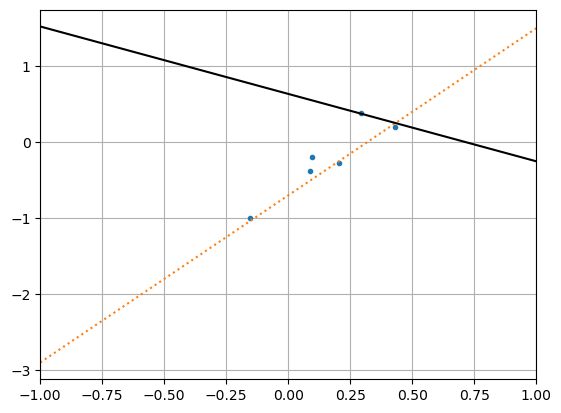

In [77]:
# A warning about weighting

_poly = np.polyfit(x, y_meas, deg=DEG)
y_mdl = np.polyval(_poly, y_meas)
wgt = 1 / np.abs(y_meas - y_mdl)**2
poly = np.polyfit(x, y_meas, w=wgt, deg=DEG)

plt.figure()
plt.plot(x, y, '.')
plt.plot(XRANGE, func(np.array(XRANGE)), ':')
plt.plot(XRANGE, np.polyval(poly, np.array(XRANGE)), 'k-')
plt.xlim(*XRANGE)
plt.grid()